Wahid Nurrohim

23.11.5521

IF03

# IMPORT LIBRARY & LOAD DATA

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (Pastikan file sudah diupload ke Colab)
df = pd.read_csv('/content/gym_members_exercise_tracking.csv')

print("--- DATA AWAL ---")
display(df.head())

--- DATA AWAL ---


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# DATA PREPROCESSING

1. Membersihkan Data

In [13]:
print(f"\nJumlah duplikasi data: {df.duplicated().sum()}")

if df.duplicated().sum() > 0:
    df = df.drop_duplicates()


Jumlah duplikasi data: 0


2. Encoding

In [14]:
df_clean = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)

3. Menentukan Target & Fitur

In [15]:
X = df_clean.drop('Calories_Burned', axis=1)
y = df_clean['Calories_Burned']

4. Splitting Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Scaling (Normalisasi Angka)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Jumlah Fitur (Kolom X): {X_train.shape[1]}")

Jumlah Fitur (Kolom X): 16


# MODELING

Model 1: Linear Regression

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

Model 2: Random Forest Regressor

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# EVALUASI (METRIC EVALUATION)

In [21]:
def evaluasi_model(nama_model, y_asli, y_prediksi):
    mae = mean_absolute_error(y_asli, y_prediksi)
    mse = mean_squared_error(y_asli, y_prediksi)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_asli, y_prediksi)

    print(f"\n--- Evaluasi {nama_model} ---")
    print(f"MAE       : {mae:.2f}")
    print(f"RMSE      : {rmse:.2f}")
    print(f"R2 Score  : {r2:.2f}")

evaluasi_model("Linear Regression", y_test, y_pred_lr)
evaluasi_model("Random Forest", y_test, y_pred_rf)


--- Evaluasi Linear Regression ---
MAE       : 30.27
RMSE      : 40.57
R2 Score  : 0.98

--- Evaluasi Random Forest ---
MAE       : 36.53
RMSE      : 47.66
R2 Score  : 0.97


# VISUALISASI HASIL

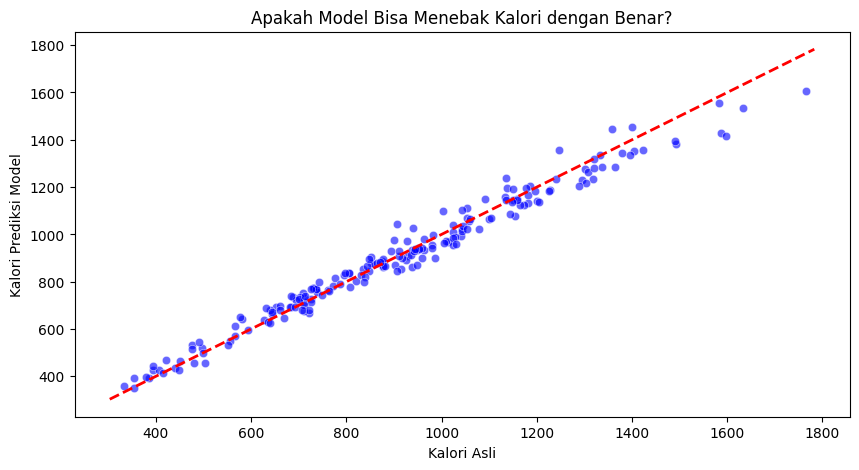

In [23]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Kalori Asli")
plt.ylabel("Kalori Prediksi Model")
plt.title("Apakah Model Bisa Menebak Kalori dengan Benar?")
plt.show()

Cek Pentingnya Fitur (Feature Importance)

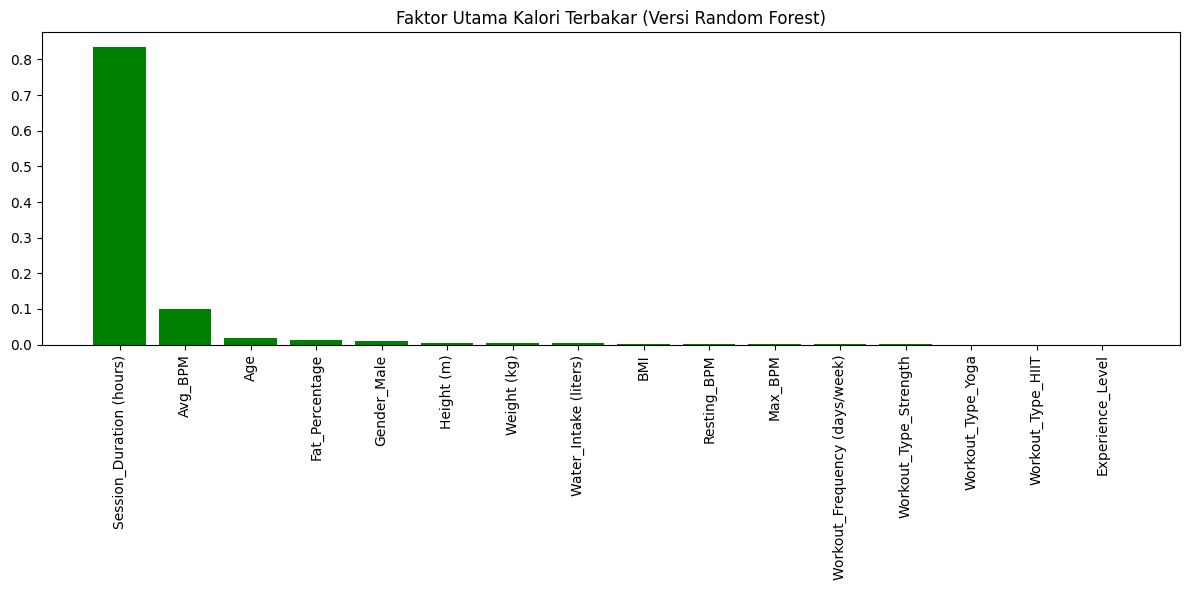

In [25]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Faktor Utama Kalori Terbakar (Versi Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='green')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

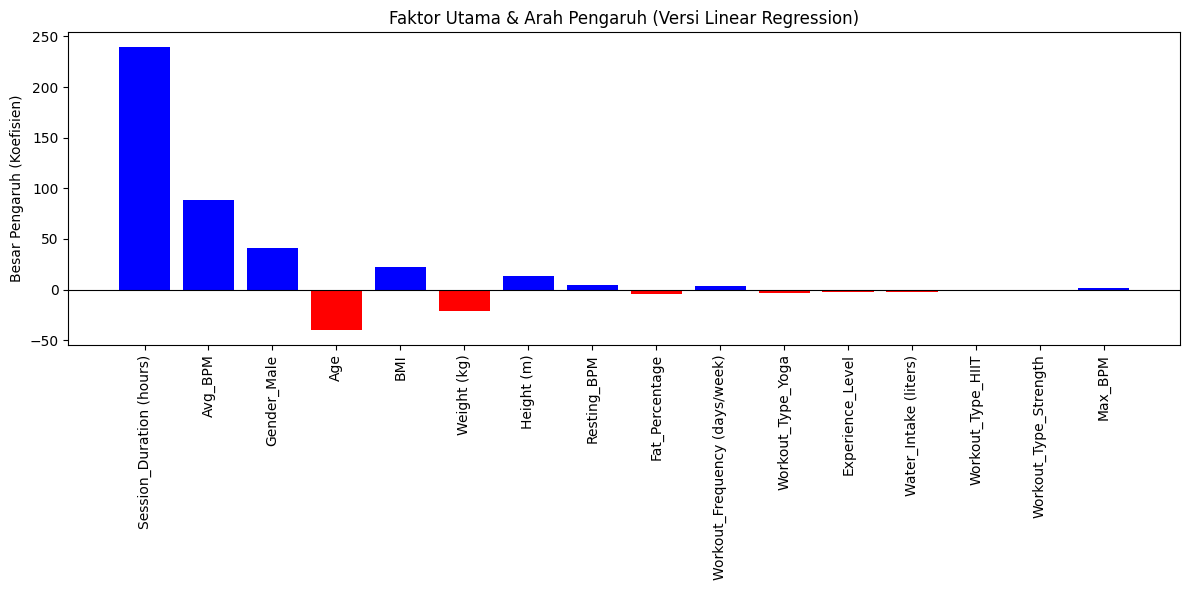

In [26]:
coefficients = lr_model.coef_
feature_names = X.columns

indices = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(12, 6))
plt.title("Faktor Utama & Arah Pengaruh (Versi Linear Regression)")

# Visualisasi: Warna Biru jika menambah kalori (+), Merah jika mengurangi (-)
colors = ['blue' if coefficients[i] > 0 else 'red' for i in indices]

plt.bar(range(X.shape[1]), coefficients[indices], align="center", color=colors)
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)

plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Besar Pengaruh (Koefisien)")
plt.tight_layout()
plt.show()

In [28]:
import joblib
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model dan vectorizer berhasil disimpan")

Model dan vectorizer berhasil disimpan
